In [373]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Data file paths
energy_data_path = "Resources/energy_data_state.csv"

# Read the mouse data and the study results
energy_data = pd.read_csv(energy_data_path)

energy_data = energy_data.drop(energy_data.index[[0,1]])

In [374]:
energy_data.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,"974,521"
3,1990,AK,Total Electric Power Industry,Natural Gas,"3,466,261"
4,1990,AK,Total Electric Power Industry,Petroleum,"497,116"
5,1990,AK,Total Electric Power Industry,Wind,0
6,1990,AK,Total Electric Power Industry,Wood and Wood Derived Fuels,"151,035"


In [375]:
# Data types
energy_data.dtypes

YEAR                           int64
STATE                         object
TYPE OF PRODUCER              object
ENERGY SOURCE                 object
GENERATION (Megawatthours)    object
dtype: object

In [376]:
# Cleaning up the column names
energy_data = energy_data.rename(columns={
    "YEAR":"Year",
    "STATE": "State",
    "TYPE OF PRODUCER":"Type of Producer",
    "ENERGY SOURCE":"Energy Source",
    "GENERATION (Megawatthours)":"Megawatt Hours"
    })
energy_data.head()

,Year,State,Type of Producer,Energy Source,Megawatt Hours
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,"974,521"
3,1990,AK,Total Electric Power Industry,Natural Gas,"3,466,261"
4,1990,AK,Total Electric Power Industry,Petroleum,"497,116"
5,1990,AK,Total Electric Power Industry,Wind,0
6,1990,AK,Total Electric Power Industry,Wood and Wood Derived Fuels,"151,035"


In [377]:
# Seeing all unique types of energy sources in our data
unique_energy_sources = energy_data["Energy Source"].unique()
unique_energy_sources

array(['Hydroelectric Conventional', 'Natural Gas', 'Petroleum', 'Wind',
       'Wood and Wood Derived Fuels', 'Total', 'Coal', 'Nuclear',
       'Other Biomass', 'Other Gases', 'Pumped Storage', 'Geothermal',
       'Other', 'Solar Thermal and Photovoltaic'], dtype=object)

In [378]:
# Getting rid of commas in the entire data set
energy_data["Megawatt Hours"] = energy_data["Megawatt Hours"].apply(lambda x: int(x.split()[0].replace(',', '')))

In [379]:
# Creating national data frame bt totals
national_total = energy_data.loc[energy_data["Energy Source"] == "Total", :]
national_total

,Year,State,Type of Producer,Energy Source,Megawatt Hours
7,1990,AK,"Electric Generators, Electric Utilities",Total,4493024
13,1990,AK,"Combined Heat and Power, Industrial Power",Total,840949
17,1990,AK,"Combined Heat and Power, Commercial Power",Total,265533
20,1990,AL,Total Electric Power Industry,Total,79652133
29,1990,AL,"Electric Generators, Independent Power Producers",Total,27936
...,...,...,...,...,...
53723,2019,WV,"Electric Generators, Electric Utilities",Total,48312222
53729,2019,WY,Total Electric Power Industry,Total,42145656
53738,2019,WY,"Combined Heat and Power, Industrial Power",Total,1338019
53744,2019,WY,"Electric Generators, Independent Power Producers",Total,3200898


In [380]:
national_total.dtypes

Year                 int64
State               object
Type of Producer    object
Energy Source       object
Megawatt Hours       int64
dtype: object

In [10]:
# Changing to int
#df['purchase'].astype(str).astype(int)
#df["a"] = df["a"].astype(str).astype(int)
energy_data["Megawatt Hours"] = energy_data["Megawatt Hours"].astype(np.int64)

In [11]:
energy_data.dtypes

Year                 int64
State               object
Type of Producer    object
Energy Source       object
Megawatt Hours       int64
dtype: object

In [13]:
energy_data["Megawatt Hours"].mean()

16931678.7898575

In [15]:
# Sum of total energy (Needed for finding %)
national_total_sum = national_total["Megawatt Hours"].sum()
national_total_sum

455070186352

In [16]:
national_total["Megawatt Hours"].describe()

count    8.338000e+03
mean     5.457786e+07
std      2.858444e+08
min     -2.063080e+05
25%      3.740448e+05
50%      4.136522e+06
75%      4.019896e+07
max      4.178277e+09
Name: Megawatt Hours, dtype: float64

In [17]:
# Remove total
cleaned_df = energy_data[energy_data["Energy Source"] != "Total"]

In [18]:
# Creating a data frame with the total amount of Solar energy 
national_solar_power = energy_data.loc[energy_data["Energy Source"] == "Solar Thermal and Photovoltaic", :]
national_solar_power


,Year,State,Type of Producer,Energy Source,Megawatt Hours
109,1990,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,366668
120,1990,CA,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,364639
131,1990,CA,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,2029
1160,1990,TX,Total Electric Power Industry,Solar Thermal and Photovoltaic,385
1171,1990,TX,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,385
...,...,...,...,...,...
53657,2019,WI,Total Electric Power Industry,Solar Thermal and Photovoltaic,37892
53674,2019,WI,"Combined Heat and Power, Commercial Power",Solar Thermal and Photovoltaic,2119
53687,2019,WI,"Electric Generators, Independent Power Producers",Solar Thermal and Photovoltaic,35773
53736,2019,WY,Total Electric Power Industry,Solar Thermal and Photovoltaic,180138


In [19]:
# Sum of solar power 
solar_sum = national_solar_power["Megawatt Hours"].sum()
solar_sum

1179675810

In [381]:
# Percentage of solar power
percentage_solar = (solar_sum/national_total_sum)*100
percentage_solar


0.25922942117054276

In [30]:
# df and sum of coal
national_coal = energy_data.loc[energy_data["Energy Source"] == "Coal", :]
coal_sum = national_coal["Megawatt Hours"].sum()
coal_sum

203908261635

In [345]:
# For Pie chart, subtracting coal and solar from total output
total_minus_coal_solar = 455070186352 - 1179675810 - 203908261635
total_minus_coal_solar

249982248907

In [366]:
# Formating pie
energy = ["Coal","Solar", 'All Other Energy Types']
values = [203908261635,1179675810,249982248907]
colors = ["plum","red", "skyblue"]
explode = (0.0, 0.0,0.07)

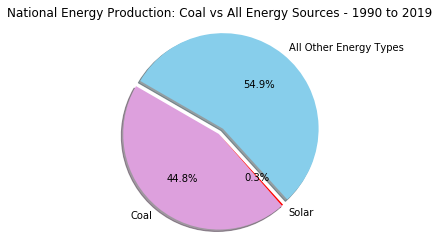

In [382]:
# Displaying our pie char
plt.title("National Energy Production: Coal vs All Energy Sources - 1990 to 2019")
plt.pie(values, explode=explode, labels=energy, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.show()

In [47]:
# Seeing column names again
unique_energy_sources

array(['Hydroelectric Conventional', 'Natural Gas', 'Petroleum', 'Wind',
       'Wood and Wood Derived Fuels', 'Total', 'Coal', 'Nuclear',
       'Other Biomass', 'Other Gases', 'Pumped Storage', 'Geothermal',
       'Other', 'Solar Thermal and Photovoltaic'], dtype=object)

In [48]:
# hdro df and sum
national_hydro = energy_data.loc[energy_data["Energy Source"] == "Hydroelectric Conventional", :]
hydro_sum = national_hydro["Megawatt Hours"].sum()
hydro_sum

33802723567

In [49]:
# Gas df and sum
national_natural_gas = energy_data.loc[energy_data["Energy Source"] == "Natural Gas", :]
natural_gas_sum = national_natural_gas["Megawatt Hours"].sum()
natural_gas_sum

98650560015

In [50]:
national_petroleum = energy_data.loc[energy_data["Energy Source"] == "Petroleum", :]
petroleum_sum = national_petroleum["Megawatt Hours"].sum()
petroleum_sum

8937205980

In [51]:
national_wind = energy_data.loc[energy_data["Energy Source"] == "Wind", :]
wind_sum = national_wind["Megawatt Hours"].sum()
wind_sum

8932512616

In [52]:
national_wood = energy_data.loc[energy_data["Energy Source"] == "Wood and Wood Derived Fuels", :]
wood_sum = national_wood["Megawatt Hours"].sum()
wood_sum

4549361489

In [53]:
national_nuclear = energy_data.loc[energy_data["Energy Source"] == "Nuclear", :]
nuclear_sum = national_nuclear["Megawatt Hours"].sum()
nuclear_sum

89001615614

In [54]:
national_other_biomass = energy_data.loc[energy_data["Energy Source"] == "Other Biomass", :]
other_biomass_sum = national_other_biomass["Megawatt Hours"].sum()
other_biomass_sum


2263407622

In [55]:
national_other_gases = energy_data.loc[energy_data["Energy Source"] == "Other Gases", :]
other_gases_sum = national_other_gases["Megawatt Hours"].sum()
other_gases_sum


1533194421

In [56]:
# Weird that it's a negative number
national_pumped_storage = energy_data.loc[energy_data["Energy Source"] == "Pumped Storage", :]
pumped_storage_sum = national_pumped_storage["Megawatt Hours"].sum()
pumped_storage_sum


-673106064

In [58]:
national_geothermal = energy_data.loc[energy_data["Energy Source"] == "Geothermal", :]
geothermal_sum = national_geothermal["Megawatt Hours"].sum()
geothermal_sum



1816247188

In [59]:
national_other = energy_data.loc[energy_data["Energy Source"] == "Other", :]
other_sum = national_other["Megawatt Hours"].sum()
other_sum

1173615425

In [125]:
# Formating pie chart 
energy = ['Hydroelectric', 'Natural Gas', 'Petroleum', 'Wind',
       'Wood Derived Fuels', 'Coal', 'Nuclear',
       'Other Biomass', 'Other Gases', 'Pumped Storage', 'Geothermal',
       'Other', 'Solar']
values = [33802723567, 98650560015, 8937205980, 8932512616, 4549361489, 203908261635, 89001615614, 2263407622, 
         1533194421, -673106064, 1816247188,1173615425, 1179675810]
colors = ["slategrey", 'forestgreen', 'bisque', 'black', 'blue', 'wheat', 'lightcoral', 'gold', 'cyan', 'violet'
          , 'peru', 'pink', 'red']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0,    0,0.5,1,1.5,2,2.5   )

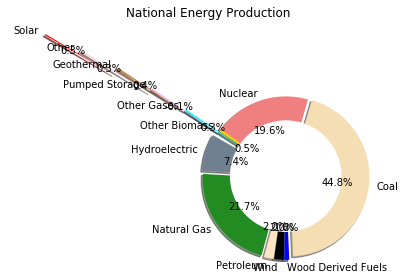

In [130]:
# Displaying pie, too messy
plt.title("National Energy Production")
plt.pie(values, explode=explode, labels=energy, colors=colors,
        autopct="%1.1f%%", shadow=True, radius=1.0,startangle=150)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


                     
plt.axis("equal")
plt.tight_layout()
plt.show()

In [129]:
# combine other biomass, other gases, pumped storage, other b/c percentages are so small
energy_sources_added = 2263407622 + 1533194421 -673106064 +1816247188 +1173615425
energy_sources_added

6113358592

In [334]:
# New pie chart with combnined other data
energy = ['Hydroelectric','Wind', 'Natural Gas',
       'Wood Derived Fuels', 'Coal','Petroleum','Solar', 'Nuclear',
       'Other']
values = [33802723567,8932512616,98650560015, 4549361489, 203908261635,8937205980,1179675810, 89001615614, 6113358592]
colors = ['Salmon', 'khaki', 'cadetblue', 'palegreen', 'plum', 'skyblue', 'red','darkgray', 'cornflowerblue']
explode = (0.0,0,0,0,0.1,0.0,0.4,0,0.0 )

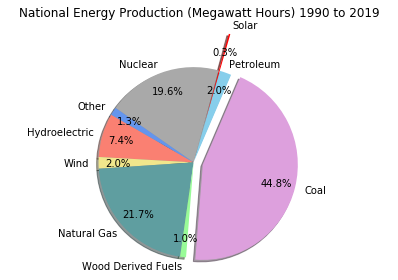

In [335]:
# Displaying pie
plt.title("National Energy Production (Megawatt Hours) 1990 to 2019")
plt.pie(values, explode=explode, labels=energy, colors=colors,
        autopct="%1.1f%%", pctdistance=.8, labeldistance=1.1, shadow=True, radius=1.0,startangle=150)

#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)


                     
plt.axis("equal")
plt.tight_layout()
plt.savefig('national_energy_production.png')
plt.show()

In [301]:
# Creating a dictionary/df from nicos code
my_dict= {"COAL": coal_sum, "HYDROELECTRIC CONVENTIONAL":hydro_sum, "NATURAL GAS": natural_gas_sum, 
                        "PETROLEUM": petroleum_sum, "WIND": wind_sum, "WOOD": wood_sum, 
                        "NUCLEAR":nuclear_sum, "OTHER BIOMASS": other_biomass_sum, "OTHER GASES": other_gases_sum, 
                        "PUMPED STORAGE": pumped_storage_sum, "GEOTHERMAL": geothermal_sum, "OTHER": other_sum, "SOLAR THERMAL AND PHOTOVOLTAIC": solar_sum}
final_df = pd.DataFrame([my_dict])

final_df



<Figure size 432x288 with 0 Axes>

In [158]:
#final_df.plot.pie()
#final_df.plot(kind='pie')
#fig = plt.figure(figsize=(6,6), dpi=200)
#ax = plt.subplot=true

# Cannot get this to work
final_df.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17, subplots=True)

C:\Users\Gage\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF24460108>,
      dtype=object)